In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [6]:
import os
path = os.listdir('C:\\Users\\KIIT\\OneDrive\\Desktop\\ALL Detector\\all_img')
classes = {'healthy':0, 'ALL':1}

In [12]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.8 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.8 MB 14.9 MB/s eta 0:00:03
   ------- -------------------------------- 7.6/38.8 MB 14.7 MB/s eta 0:00:03
   ----------- ---------------------------- 11.0/38.8 MB 15.3 MB/s eta 0:00:02
   --------------- ------------------------ 15.2/38.8 MB 16.2 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.8 MB 16.5 MB/s eta 0:00:02
   ---------------------- ----------------- 22.3/38.8 MB 16.8 MB/s eta 0:00:01
   -------------------------- ------------- 25.4/38.8 MB 16.4 MB/s eta 0:00:01
   ------------------------------ --------- 29.9/38.8 MB 16.9 MB/s eta 0:00:01
   ----------------------------------- ---- 34.3/38.8 MB 17.3 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.8 MB 17.6 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 16.7 MB

In [18]:
import cv2
X = []
Y = []
for cls in classes :
    pth = 'C:\\Users\\KIIT\\OneDrive\\Desktop\\ALL Detector\\all_img\\'+cls
    for j in os.listdir(pth) :
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [19]:
np.unique(Y)

array([0, 1])

In [22]:
X = np.array(X)
Y = np.array(Y)

In [24]:
pd.Series(Y).value_counts()

1    2752
0     504
Name: count, dtype: int64

In [26]:
X.shape

(3256, 200, 200)

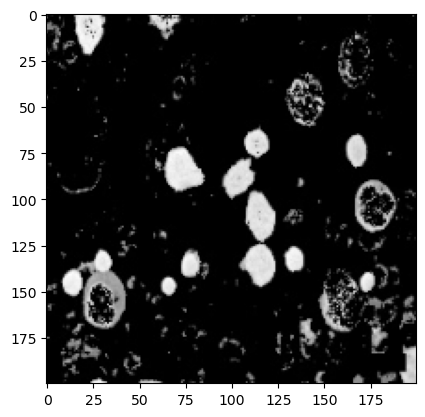

In [28]:
plt.imshow(X[1], cmap='gray')

In [30]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3256, 40000)

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [34]:
xtrain.shape, xtest.shape

((2604, 40000), (652, 40000))

In [36]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

245 0
243 0
0.9607843137254902 0.0
0.9529411764705882 0.0


In [38]:
from sklearn.decomposition import PCA

In [40]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(2604, 40000) (652, 40000)


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)

In [46]:
print("Training Score:", clf.score(xtrain, ytrain))
print("Testing Score:", clf.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.8619631901840491


In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.8619631901840491


In [51]:
dec = {0:'healthy' , 1:'ALL'}

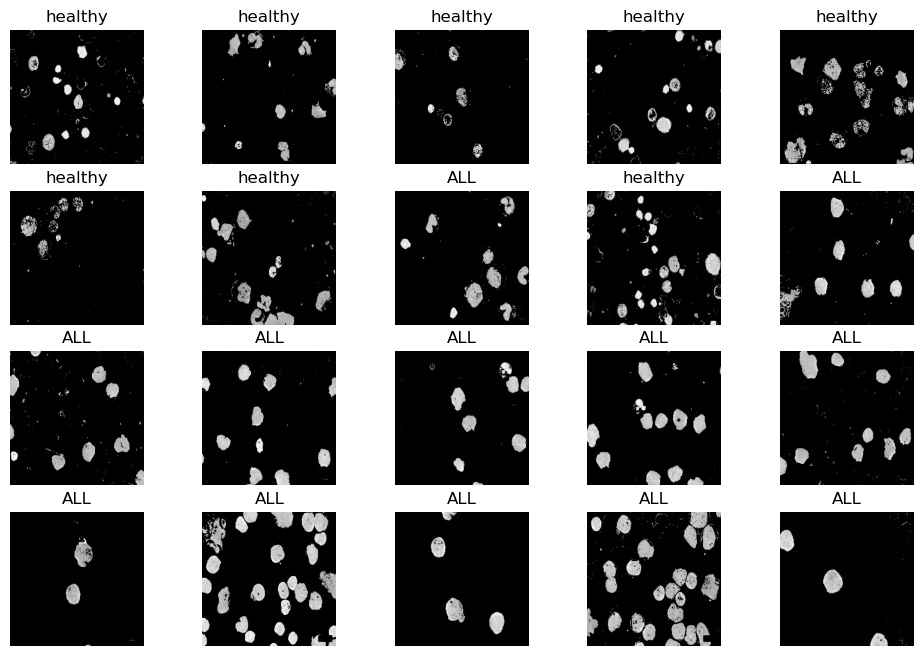

In [61]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\KIIT\\OneDrive\\Desktop\\ALL Detector')
c=1
for i in os.listdir('C:\\Users\\KIIT\\OneDrive\\Desktop\\ALL Detector\\all_img\\Test')[:20]:
    plt.subplot(4,5,c)

    img = cv2.imread('C:\\Users\\KIIT\\OneDrive\\Desktop\\ALL Detector\\all_img\\Test\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = clf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1